In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
import logging
import matplotlib.pyplot as plt
from notebooks.load_dataset.load_dataset import classes, x_train, y_train, x_test, y_test

tf.get_logger().setLevel(logging.ERROR)

In [7]:
from tensorflow.keras.utils import to_categorical

X_train = np.array(x_train, dtype=np.float16)
X_test = np.array(x_train, dtype=np.float16)

X_train = X_train / 255
X_test = X_test / 255

Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [3]:
from keras import layers
from keras import models

model = models.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [5]:
from keras.callbacks import ModelCheckpoint

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

checkpoint = ModelCheckpoint(
    "models/newmodel.h5",
    monitor="val_acc",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="auto",
)

history = model.fit(
    X_train,
    Y_train,
    batch_size=64,
    epochs=5,
    validation_split=0.2,
    callbacks=[checkpoint],
)

Epoch 1/5
625/625 [==============================] - 53s 76ms/step - loss: 1.7538 - accuracy: 0.3629 - val_loss: 1.4268 - val_accuracy: 0.4923
Epoch 2/5
625/625 [==============================] - 45s 72ms/step - loss: 1.3488 - accuracy: 0.5207 - val_loss: 1.2564 - val_accuracy: 0.5468
Epoch 3/5
625/625 [==============================] - 35s 56ms/step - loss: 1.1614 - accuracy: 0.5915 - val_loss: 1.1496 - val_accuracy: 0.6078
Epoch 4/5
625/625 [==============================] - 60s 95ms/step - loss: 1.0318 - accuracy: 0.6391 - val_loss: 1.0534 - val_accuracy: 0.6259
Epoch 5/5
625/625 [==============================] - 54s 87ms/step - loss: 0.9297 - accuracy: 0.6756 - val_loss: 0.9549 - val_accuracy: 0.6688


1/1 [==============================] - 1s 594ms/step
 Labels:      [5 7 9 6 3 4 6 4 9 7 1 2 5 2 8]
 Predictions: [7 9 9 9 5 7 5 9 1 5 1 5 0 7 0]


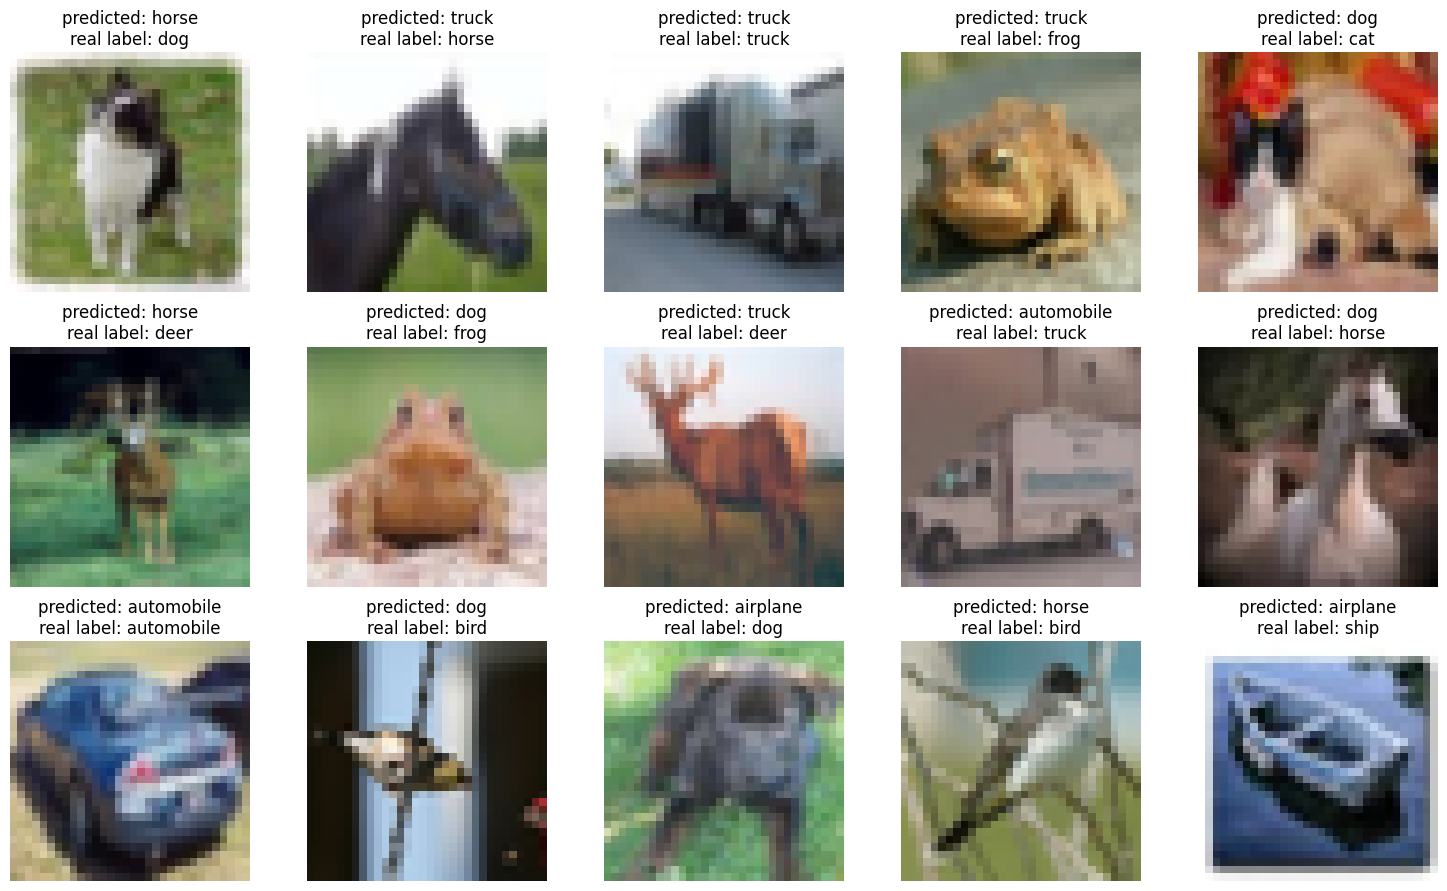

In [6]:
from results.functions import visualize_predictions, history_plot

visualize_predictions(model)

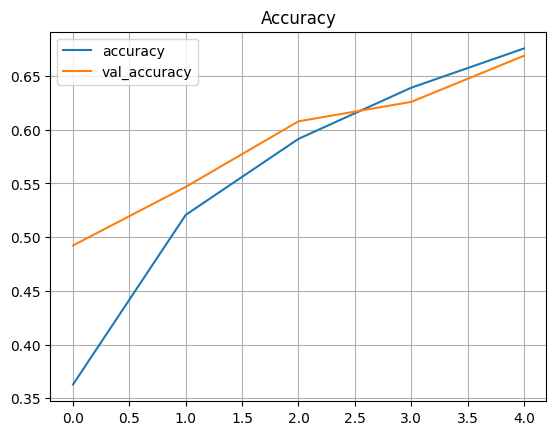

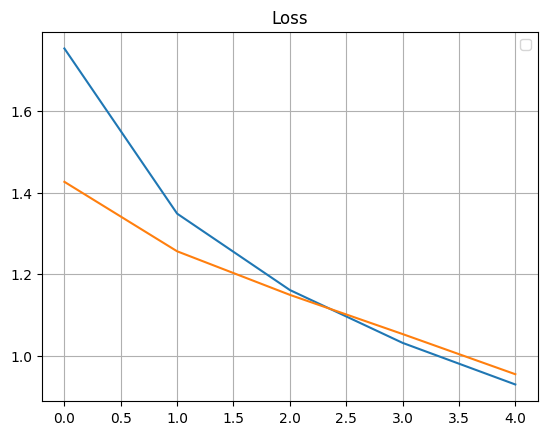

In [8]:
history_plot(history)

In [3]:
model = tf.keras.models.load_model("models/newmodel.h5")

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 1024)             

In [10]:
from results.functions import calculate_percent_right_base

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(Y_test, axis=1)

# Подсчет правильно классифицированных изображений для каждого класса
correct_counts = np.zeros(10, dtype=np.int32)
total_counts = np.zeros(10, dtype=np.int32)

for true_label, pred_label in zip(y_true, y_pred):
    if true_label == pred_label:
        correct_counts[true_label] += 1
    total_counts[true_label] += 1

    # Вычисление соотношения правильно классифицированных изображений для каждого класса
ratios = correct_counts / total_counts

    # Вывод результатов
for i, ratio in enumerate(ratios):
    print(
        f"Класс {i} ({classes[i]}): правильно классифицировано {correct_counts[i]} из {total_counts[i]} ({ratio:.2%})"
    )

1563/1563 [==============================] - 30s 18ms/step
Класс 0 (airplane): правильно классифицировано 112 из 1000 (11.20%)
Класс 1 (automobile): правильно классифицировано 97 из 1000 (9.70%)
Класс 2 (bird): правильно классифицировано 92 из 1000 (9.20%)
Класс 3 (cat): правильно классифицировано 95 из 1000 (9.50%)
Класс 4 (deer): правильно классифицировано 146 из 1000 (14.60%)
Класс 5 (dog): правильно классифицировано 78 из 1000 (7.80%)
Класс 6 (frog): правильно классифицировано 98 из 1000 (9.80%)
Класс 7 (horse): правильно классифицировано 103 из 1000 (10.30%)
Класс 8 (ship): правильно классифицировано 106 из 1000 (10.60%)
Класс 9 (truck): правильно классифицировано 83 из 1000 (8.30%)
